# **LAB 1 : Yoga Class Analysis using Human pose estimation** 



The task of classifying yoga pose images entails automatically categorizing images of individuals performing different yoga poses into distinct groups. This particular task falls under the umbrella of machine learning, specifically image recognition. To successfully execute this task, a classification model must be capable of analyzing the images and sorting them into specific yoga pose categories, such as warrior pose, head down pose, mountain pose, and so on. To accomplish this, image recognition techniques such as convolutional neural networks (CNNs) can be employed.



## Importing Libraries

In [ ]:
%%capture
!pip install imutils
!pip install super-gradients==3.0.7
!pip install torchinfo
!pip install Pillow
!pip install torchvision

In [ ]:
%%capture
!pip install tensorflow --user

In [ ]:
#Printing the Current Working Directory
import os
print(os.getcwd())

C:\Users\Lenovo


In [ ]:
import os
import numpy as np
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from torchvision import transforms

Changing the current working Directory to the dataset Directory

In [ ]:
# change the current working directory 
os.chdir(r'D:\YOGA\content\cleaned\DATASET')

# verify that the current working directory has been changed
print(os.getcwd())

D:\YOGA\content\cleaned\DATASET


### Loading Train set :

In [ ]:
# save the train set path in the dataset_path variable
dataset_path = os.listdir('TRAIN')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Types of classes labels found:  5


In [ ]:
# extract the file names in the class_labels list
class_labels = []


for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('TRAIN' + '/' +item)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [ ]:
# Build a dataframe for the train set      
df_train = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df_train.head())
print(df_train.tail())

    Labels                              image
0  downdog  dataset_path/downdog/00000128.jpg
1  downdog  dataset_path/downdog/00000129.jpg
2  downdog  dataset_path/downdog/00000130.jpg
3  downdog  dataset_path/downdog/00000131.jpg
4  downdog  dataset_path/downdog/00000132.png
        Labels                               image
1070  warrior2  dataset_path/warrior2/00000433.jpg
1071  warrior2  dataset_path/warrior2/00000434.jpg
1072  warrior2  dataset_path/warrior2/00000436.jpg
1073  warrior2  dataset_path/warrior2/00000437.jpg
1074  warrior2  dataset_path/warrior2/00000438.jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df_train))

label_count = df_train['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1075
plank       264
warrior2    250
downdog     223
goddess     178
tree        160
Name: Labels, dtype: int64


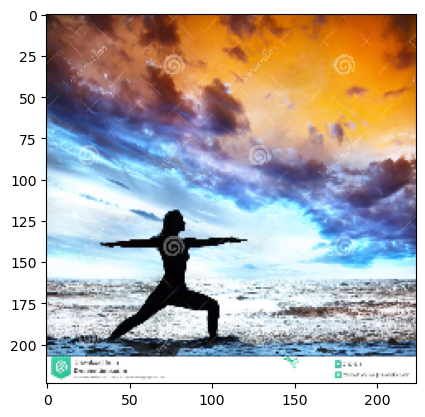

In [ ]:
# display a random image from the train set
# resize
import cv2
path = 'TRAIN/'
dataset_path = os.listdir('TRAIN')

im_size = 224

images_train = []
labels_train = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img_train = cv2.imread(data_path + '/' + f)
        img_train = cv2.resize(img_train, (im_size, im_size))
        images_train.append(img_train)
        labels_train.append(i)
        plt.imshow(img_train)

In [ ]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images_train = np.array(images_train)

images_train = images_train.astype('float32') / 255.0
images_train.shape

(1075, 224, 224, 3)

### Loading Test set :


Now using the OS module we list the files and directories in the TEST folder and store them in dataset_path variable . than we printed its content and its length . 

In [ ]:
dataset_path = os.listdir('TEST')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Types of classes labels found:  5


 now we construct a list of tuples that contain a label for a class in a dataset and the path to an image file belonging to that class. we did this by iterating over the directories in the 'TEST' folder, then for each directory, it gets a list of all the files in that directory and constructs a tuple for each file that contains the directory label and the path to that file.


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('TEST' + '/' +item)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))


now we prepare our dataframe by calling the pd.DataFrame() function that uses Pandas library , The first argument is the data to be included in the DataFrame, which is the class_labels list. The second argument specifies the names to be used for the columns of the DataFrame, which are 'Labels' and 'image'.
The resulting DataFrame is stored in the df_test variable. 
Then we print the first five rows of the DataFrame using head() method and similarly the last five rows using tail() 


In [ ]:
# Build a dataframe        
df_test = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df_test.head())
print(df_test.tail())

    Labels                              image
0  downdog  dataset_path/downdog/00000000.jpg
1  downdog  dataset_path/downdog/00000001.JPG
2  downdog  dataset_path/downdog/00000002.jpg
3  downdog  dataset_path/downdog/00000003.jpg
4  downdog  dataset_path/downdog/00000004.jpg
       Labels                               image
461  warrior2  dataset_path/warrior2/00000113.jpg
462  warrior2  dataset_path/warrior2/00000114.jpg
463  warrior2  dataset_path/warrior2/00000115.png
464  warrior2  dataset_path/warrior2/00000116.jpg
465  warrior2  dataset_path/warrior2/00000117.jpg


Now let's check how many samples for each category are present .so we printed the total number of images in the dataset which is 466 . 
The value_counts() method is called on the Labels column of the DataFrame df_test to count the number of images for each unique label category. This count is then printed to the console as label_count


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df_test))

label_count = df_test['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  466
plank       114
warrior2    109
downdog      97
goddess      77
tree         69
Name: Labels, dtype: int64


and then reading image data from TEST directory and storing  the images in a list images_test while storing the corresponding label category for each image in a list labels_test.  we assign the variable im_sixe a value of224 which is the desired size for the images . then the code loops through each file in dataset_path and reads the image file using the OpenCV library cv2. The image is then resized to im_size using the cv2.resize() function and appended to the images_test list. The corresponding label category for the image is also appended to the labels_test list.
Finally, the code displays the image using plt.imshow() function.


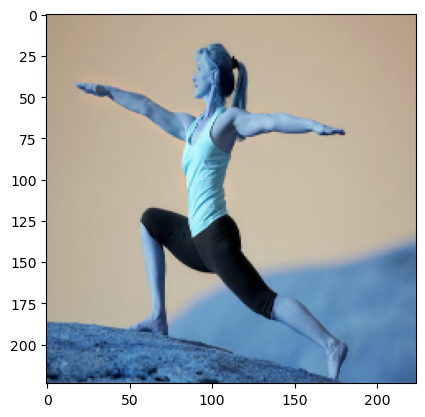

In [ ]:
path = 'TEST/'
dataset_path = os.listdir('TEST')

im_size = 224

images_test = []
labels_test = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img_test = cv2.imread(data_path + '/' + f)
        img_test = cv2.resize(img_test, (im_size, im_size))
        images_test.append(img_test)
        labels_test.append(i)
        plt.imshow(img_test)

subsequently , we prepare the image data for the model . First, the images_test list of images is converted into a NumPy array using the np.array() function.

    Then, the pixel values of the image data are normalized by dividing by 255.0 and converting to type float32. This normalization is often done to ensure that all pixel values fall within the range of 0 to 1, which can help with the training of our model.


In [ ]:
images_test = np.array(images_test)

images_test = images_test.astype('float32') / 255.0
images_test.shape

(466, 224, 224, 3)

### Plot :

Now we are plotting a bar graph using the Matplotlib library.
First, we use the value_counts() method to get the counts of unique values in the 'Labels' column. Then, we are creating a bar plot of the counts using the plot.bar() method on the counts variable.

Next, we are setting the title and axis labels for the plot using the title(), xlabel(), and ylabel() methods from Matplotlib. Finally, we are displaying the plot using the show() method.

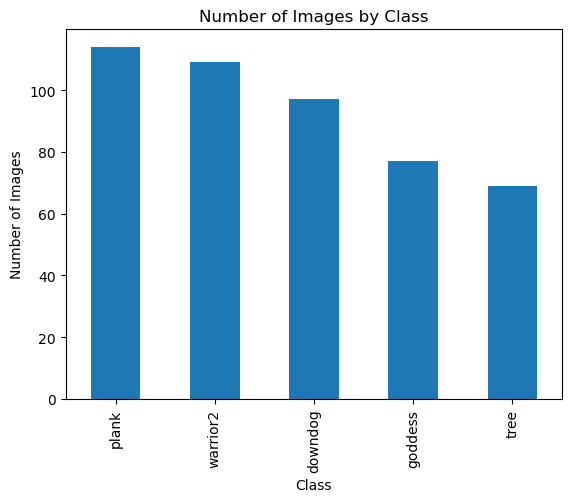

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of unique values in the 'Labels' column
counts = df_test['Labels'].value_counts()

# Create a bar plot of the counts
counts.plot.bar()

# Set the title and axis labels
plt.title('Number of Images by Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# Display the plot
plt.show()

now we are generating a visual representation of the distribution of categories in the 'Labels' column of the training data.

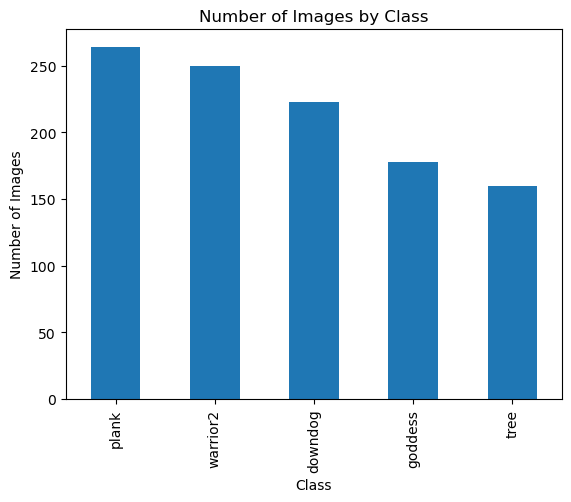

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of unique values in the 'Labels' column
counts = df_train['Labels'].value_counts()

# Create a bar plot of the counts
counts.plot.bar()

# Set the title and axis labels
plt.title('Number of Images by Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# Display the plot
plt.show()

### Initialize Augmentations

##### Methods used for the data augmentation :

* **Resize:** Resizes the image to a specified height and width.<br><br>
* **CenterCrop:** Crops the center portion of the image to the specified height and width.<br><br>
* **RandomCrop:** Randomly crops a portion of the image to the specified height and width.<br><br>
* **RandomHorizontalFlip:** Flips the image horizontally with a 50% probability.<br><br>
* **RandomVerticalFlip:** Flips the image vertically with a 50% probability.<br><br>
* **RandomRotation:** Rotates the image randomly by a certain number of degrees (up to 180 degrees).<br><br>
* **RandomErasing:** Randomly erases a rectangular portion of the image.<br><br>

In [ ]:
# initialize our data augmentation functions

INPUT_HEIGHT=224
INPUT_WIDTH=224
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

resize = transforms.Resize(size=(INPUT_HEIGHT,INPUT_WIDTH))
make_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
center_cropper = transforms.CenterCrop((INPUT_HEIGHT,INPUT_WIDTH))
random_horizontal_flip = transforms.RandomHorizontalFlip(p=0.5)
random_vertical_flip = transforms.RandomVerticalFlip(p=0.5)
random_rotation = transforms.RandomRotation(degrees=180)
random_crop = transforms.RandomCrop(size=(INPUT_HEIGHT,INPUT_WIDTH))
random_erasing = transforms.RandomErasing()
# randomly_choose_one 

# initialize our training and validation set data augmentation pipeline
train_transforms = transforms.Compose([
  resize, 
  center_cropper,
  random_crop,
  random_horizontal_flip,
  random_vertical_flip,
  random_rotation,
  make_tensor,
  normalize
])

test_transforms = transforms.Compose([resize, make_tensor, normalize])

Examine what the images looks like after the augmentation pipeline

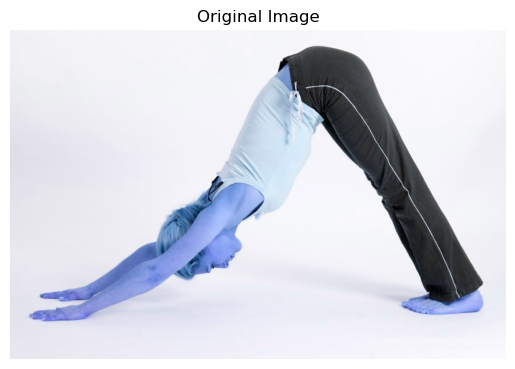

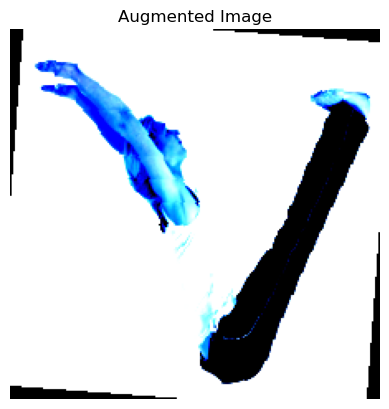

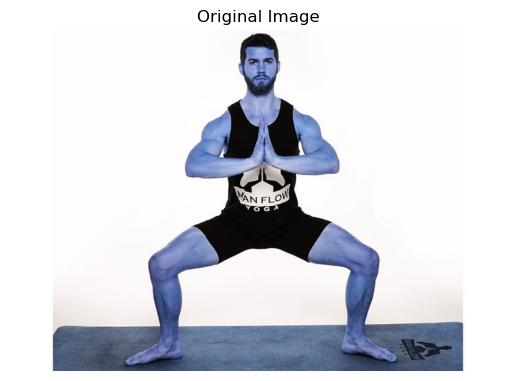

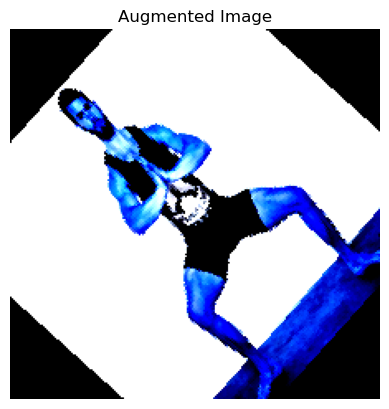

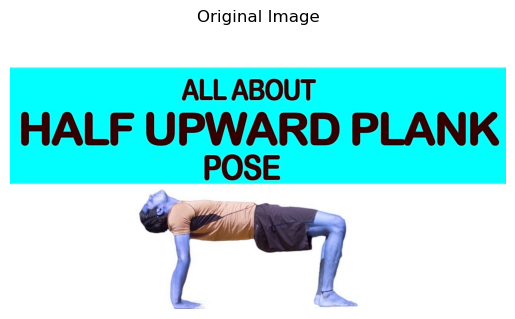

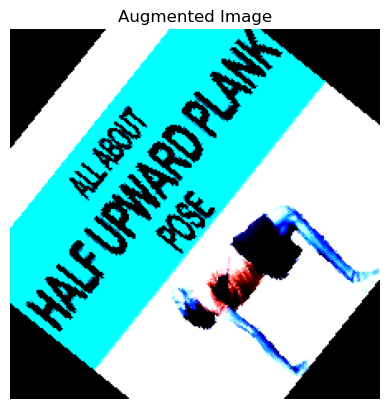

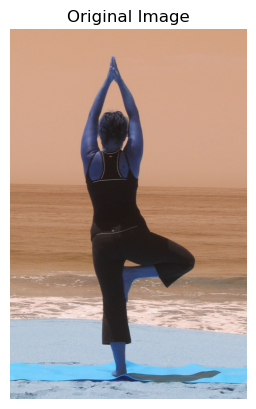

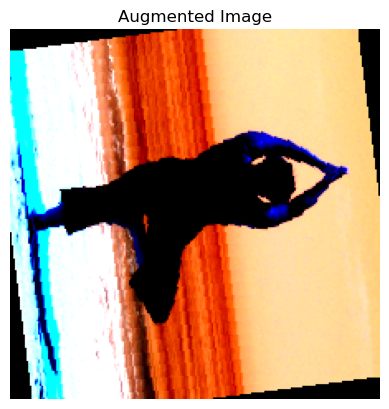

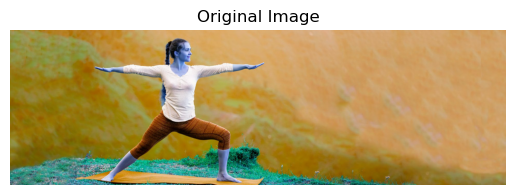

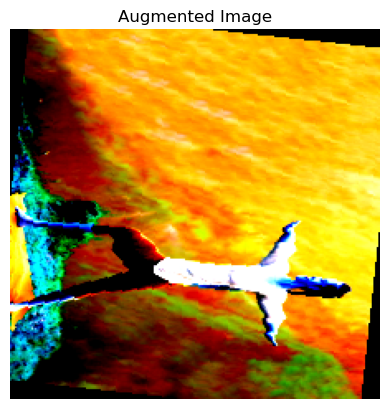

In [ ]:
from PIL import Image
import cv2

path = 'TRAIN/'
dataset_path = os.listdir('TRAIN')

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    img_train = cv2.imread(data_path + '/' + filenames[0])
    
    plt.imshow(img_train)
    plt.axis("off")
    plt.title("Original Image")
    plt.show()
    
    img_train = Image.fromarray(np.uint8(img_train))
    img_tensor = train_transforms(img_train)
    img_tensor = img_tensor.numpy().transpose((1, 2, 0))
    img_tensor = np.clip(img_tensor, 0, 1)
    
    plt.imshow(img_tensor)
    plt.axis("off")
    plt.title("Augmented Image")
    plt.show()
    
    for f in filenames:
        img_train = cv2.imread(data_path + '/' + f)

        img_train = Image.fromarray(np.uint8(img_train))
        img_tensor = train_transforms(img_train)
        img_tensor = img_tensor.numpy().transpose((1, 2, 0))
        img_tensor = np.clip(img_tensor, 0, 1)


### Preprocessing : 

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# Train set
y_train=df_train['Labels'].values
y_labelencoder = LabelEncoder ()
y_train = y_labelencoder.fit_transform (y_train)

#Test set
y_test=df_test['Labels'].values
y_test = y_labelencoder.fit_transform (y_test)

In [ ]:
y_train = y_train.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y_train = ct.fit_transform(y_train) #.toarray()

In [ ]:
y_test = y_test.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y_test = ct.fit_transform(y_test) #.toarray()

In [ ]:
train_x =images_train
test_x= images_test
train_y = Y_train
test_y = Y_test

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1075, 224, 224, 3)
(1075, 5)
(466, 224, 224, 3)
(466, 5)


### Training 

We are using the EfficientNetB0 model architecture from the TensorFlow Keras Applications module to build a model for image classification with 5 classes. The model takes an input image with size 224x224 and uses transfer learning by loading pre-trained weights from ImageNet. A new output layer is added with a softmax activation function and the model is compiled using the Adam optimizer, categorical cross-entropy loss function, and accuracy metric. The model is trained on the training data (train_x and train_y) for 15 epochs and the history of the training process is stored in the "hist" variable. Finally, the summary of the model is printed using the "model.summary()" function.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 5
IMG_SIZE = 224

# define the model architecture
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
base_model = EfficientNetB0(include_top=False, input_tensor=inputs, weights='imagenet')
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y.toarray(), epochs=15, verbose=2)

# print the model summary
model.summary()

Epoch 1/15
34/34 - 160s - loss: 0.5264 - accuracy: 0.8195 - 160s/epoch - 5s/step
Epoch 2/15
34/34 - 141s - loss: 0.1487 - accuracy: 0.9479 - 141s/epoch - 4s/step
Epoch 3/15
34/34 - 139s - loss: 0.0594 - accuracy: 0.9833 - 139s/epoch - 4s/step
Epoch 4/15
34/34 - 139s - loss: 0.0804 - accuracy: 0.9730 - 139s/epoch - 4s/step
Epoch 5/15
34/34 - 138s - loss: 0.0957 - accuracy: 0.9730 - 138s/epoch - 4s/step
Epoch 6/15
34/34 - 136s - loss: 0.0748 - accuracy: 0.9758 - 136s/epoch - 4s/step
Epoch 7/15
34/34 - 138s - loss: 0.0490 - accuracy: 0.9823 - 138s/epoch - 4s/step
Epoch 8/15
34/34 - 141s - loss: 0.0208 - accuracy: 0.9916 - 141s/epoch - 4s/step
Epoch 9/15
34/34 - 141s - loss: 0.0188 - accuracy: 0.9953 - 141s/epoch - 4s/step
Epoch 10/15
34/34 - 143s - loss: 0.0406 - accuracy: 0.9898 - 143s/epoch - 4s/step
Epoch 11/15
34/34 - 140s - loss: 0.0317 - accuracy: 0.9879 - 140s/epoch - 4s/step
Epoch 12/15
34/34 - 142s - loss: 0.0287 - accuracy: 0.9888 - 142s/epoch - 4s/step
Epoch 13/15
34/34 - 142s 

This next code is for visualizing a random test image and its predicted label using the trained model.

First, the class names are defined in a list. Then, a random test image and its corresponding label are selected.

Next, the model is used to make a prediction on the test image by calling model.predict() method on the test image array. The predicted label is obtained by using np.argmax() method on the prediction array.

Finally, the test image is displayed using matplotlib.pyplot.imshow(), with axis and title information. The title displays both the true label and the predicted label for the test image.

1/1 [==============================] - 0s 48ms/step


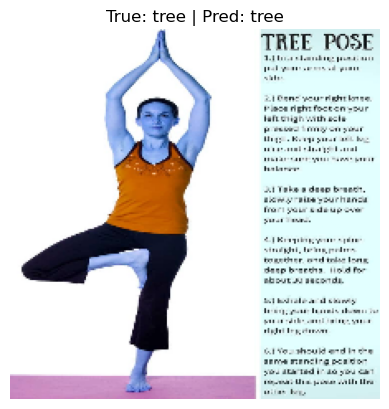

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the class names
class_names = ["downdog", "goddess", "plank", "tree", "warrior2"] 

# Visualize a random test image and its predicted label
test_idx = np.random.randint(len(images_test))
test_image = images_test[test_idx]
test_label = labels_test[test_idx]

# Make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Visualize the image and its predicted label
plt.imshow(test_image)
plt.axis('off')
plt.title(f"True: {test_label} | Pred: {class_names[predicted_label]}")
plt.show()

### Plotting the weights :

##### Displaying the number of layers :

In [ ]:
# Print the number of layers of the base model 
num_layers = len(base_model.layers)
print(num_layers)

# Print the number of layers of the model
num_layers = len(model.layers)
print(num_layers)

238
240


1-It starts a loop that iterates through all the layers in the neural network model, using the model.layers attribute

2-For each layer, it retrieves the weights using the get_weights() method. This method returns a list of all the weights (as numpy arrays) associated with the layer, including the weights for the connections between the neurons and any biases.

3-It then checks if the weights list is not empty, to ensure that it only prints the weights of layers that actually have weights.

4-If the weights list is not empty, it prints the name of the layer and its associated weights using the print() function.

##### Displaying the weights :

In [ ]:
# Print the weights of each layer
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print(layer.name)
        print(weights)


normalization
[array([0.485, 0.456, 0.406], dtype=float32), array([0.229, 0.224, 0.225], dtype=float32), 0]
stem_conv
[array([[[[ 2.51736213e-02,  8.63326609e-01, -9.77115870e-01,
           5.83449960e-01,  2.85893446e-03,  1.63878165e-02,
          -5.50184119e-03,  7.02685714e-02, -7.49313712e-01,
          -2.35936582e-01,  2.22802877e-01, -1.29155191e-02,
          -3.59276950e-01, -1.15357327e+00, -3.74135077e-02,
          -5.42517245e-01,  5.53710684e-02,  3.03884953e-01,
           7.18823552e-01,  9.17790085e-02,  1.15569690e-02,
           8.12524676e-01,  1.50949806e-01,  1.04630375e-02,
           2.54548311e-01, -6.02228463e-01,  3.73941362e-02,
           4.48364690e-02, -5.59315691e-03, -7.13153332e-02,
           2.82113031e-02, -1.42112032e-01],
         [ 2.22333968e-02,  1.58254588e+00, -1.81694019e+00,
           7.90157974e-01,  3.59755903e-02,  2.41580725e-01,
          -8.12438950e-02, -3.69384617e-01,  5.74839234e-01,
          -3.50935459e-01,  9.54220667e-02,

##### Plotting the Dense layer :

now we will visualize the weights of the last dense layer in a neural network model as a heatmap using the matplotlib library in Python.

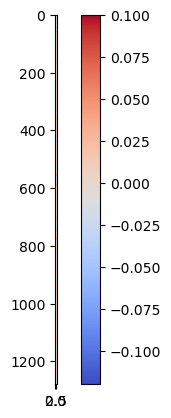

In [ ]:
import matplotlib.pyplot as plt

# Get the weights of the last Dense layer
dense_layer = model.layers[-1]
weights = dense_layer.get_weights()[0]

# Plot the weights as a heatmap
plt.imshow(weights, cmap='coolwarm')
plt.colorbar()
plt.show()
